<div style="display: flex; justify-content: space-between;"></div>
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTm17j_NAzkVxew1FKhXzoijfCb8OHIleLxNw&s" alt="Left Logo" style="width:200px;height:auto;">
    <img src="https://www.yachaytech.edu.ec/fileadmin/user_upload/uploads/LOGOS/escuela_fisica.png" alt="Right Logo" style="width:200px;height:auto;">
</div>


# Quantum Mechanics Homework 1
- **Name**: Juan Daniel Vasconez Vela
- **Semester**: IISEM2024
- **Date**: September 2024
- **Last Update**: 9/9/2024

This notebook contains solutions and analysis for the three exercises based on quantum mechanics concepts, specifically focusing on the photoelectric effect, blackbody radiation, and quantum experiments.

## Table of Contents
1. [Excercise 1: Photoelectric Effect](#excercise-1--photoelectric-effect)
2. [Excercise 2: Blackbody Radiation](#excercise-2--blackbody-radiation)
3. [Excercise 3: Quantum Concepts and Experiments](#excercise-3--quantum-concepts-and-experiments)


---

## Exercise 1: Photoelectric Effect <a id="Exercise-1-Photoelectric-Effect"></a>

### Problem Statement
This exercise involves simulating the photoelectric effect for two different metals, gathering experimental data, and analyzing the results. We will:

- Collect data for two metals by varying the wavelength of light and recording the stopping potential.
- Plot the maximum kinetic energy (Kmax) as a function of frequency for each metal.
- Perform regression to find fitting functions for each metal and compare the results.
- Calculate the work function and cutoff wavelength for each metal.

### Steps:
1. Collect data from the [Photoelectric Effect Applet](https://applets.kcvs.ca/photoelectricEffect/PhotoElectric.html).
2. Analyze the data using Python, plot graphs, and fit the data with appropriate functions.
3. Calculate the work function (ϕ) and cutoff wavelength (λcutoff) and compare them to known values.

---

## Exercise 2: Blackbody Radiation <a id="Exercise-2-Blackbody-Radiation"></a>

### Problem Statement
This exercise focuses on determining the temperature of the Sun based on its spectrum using Planck’s law. We will:

- Download the solar spectrum data from [this link](https://github.com/wbandabarragan/physics-teaching-data/blob/main/1D-data/sun_spectra.csv).
- Calculate the solid angle subtended by the Sun.
- Plot the spectral radiosity versus wavelength and fit the data using Planck’s law.
- Calculate the Sun's temperature based on the best-fit model.
- Compare the results with the classical Rayleigh-Jeans law and plot both models.

### Steps:
1. Calculate the solid angle (Ω) based on the Sun's radius and distance from Earth.
2. Plot the solar spectrum data and fit it using Planck’s law to determine the Sun's temperature.
3. Compare Planck’s law to the Rayleigh-Jeans law and analyze the differences.

---

## Exercise 3: Quantum Concepts and Experiments <a id="Exercise-3-Quantum-Concepts-and-Experiments"></a>

---

### Conclusion
This notebook covers three fundamental topics in quantum mechanics: the photoelectric effect, blackbody radiation, and key quantum concepts. Each section involves simulations, data analysis, and problem-solving using both Python code and theoretical understanding.



### Enviroment Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as ctn
from scipy import stats
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
import tensorflow as tf
%pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import savgol_filter

## Excercise 1 : Photoelectric Effect

### (a) Carry out photoelectric effect experiments for 2 different metals and collect 10 data points for each, using: https://applets.kcvs.ca/photoelectricEffect/PhotoElectric.html

### (b) Open and read the data file containing the experimental results, and make two highquality labeled scattered plots, one for each metal, with the maximum kinetic energy (Kmax) in the Y-axis and frequency on the X-axis.

First we are gonna extract the data from the downloaded csv that was collected on the applet.
And split them to 2 different dataframes for a better data managment

In [39]:
# Read the CSV file into a dataframe
df = pd.read_csv('C:/Users/sedig/Desktop/6to SEMESTRE/quantum-mechanics-1/test.csv')

# Split the dataframe into two dataframes
df_na = df[:10]
df_k = df[10:]

In [40]:
df_na.head(10)

,Trial,Metal,Voltage (V),Current (pA),Frequency (Hz),Wavelength (nm)
0,1,Sodium,0.131,0.02,5.950000e+14,504
1,2,Sodium,0.221,-0.01,6.200000e+14,484
2,3,Sodium,0.320,0.02,6.470000e+14,464
3,4,Sodium,0.440,0.01,6.760000e+14,444
4,5,Sodium,0.580,0.00,7.080000e+14,424
5,6,Sodium,0.742,0.00,7.430000e+14,404
6,7,Sodium,0.880,0.01,7.810000e+14,384
7,8,Sodium,1.060,0.00,8.240000e+14,364
8,9,Sodium,1.270,0.02,8.720000e+14,344
9,10,Sodium,1.499,-0.01,9.260000e+14,324


In [41]:
df_k.head(10)

,Trial,Metal,Voltage (V),Current (pA),Frequency (Hz),Wavelength (nm)
10,11,Potasium,0.211,-0.01,5.950000e+14,504
11,12,Potasium,0.271,-0.01,6.200000e+14,484
12,13,Potasium,0.400,0.01,6.470000e+14,464
13,14,Potasium,0.528,0.00,6.760000e+14,444
14,15,Potasium,0.672,-0.01,7.080000e+14,424
15,16,Potasium,0.789,0.00,7.430000e+14,404
16,17,Potasium,0.969,0.00,7.810000e+14,384
17,18,Potasium,1.140,0.00,8.240000e+14,364
18,19,Potasium,1.311,0.00,8.720000e+14,344
19,20,Potasium,1.559,0.01,9.260000e+14,324


Afterwards we are gonna calculate the maximum kinetic energy as the equation states:
$$ K_{max} = e^- \cdot V_s$$

In [ ]:
e = ctn.e

#Calculate Kmax
df_na['Kmax'] = e * df_na['Voltage (V)']
df_k['Kmax'] = e * df_k['Voltage (V)']


Having already this data, we can make an scattered plot for each metal and a comparison for both using as de Y-axis our $ K_{max}$ and for the X-axis our Frequency

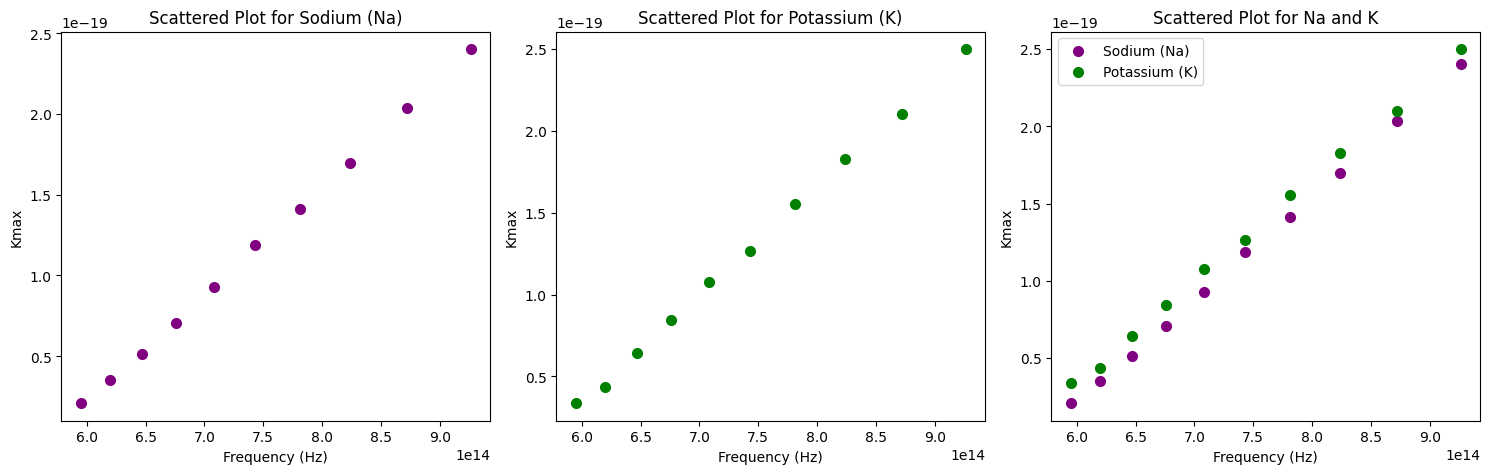

In [43]:
# Define the multiplot figure and its characteristics 
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#Plot for Sodium (Na)
axes[0].scatter(df_na['Frequency (Hz)'], df_na['Kmax'], linewidths=2, color='purple', label='Sodium (Na)')
axes[0].set_xlabel('Frequency (Hz)')
axes[0].set_ylabel('Kmax')
axes[0].set_title('Scattered Plot for Sodium (Na)')

#Plot for Potassium (K)
axes[1].scatter(df_k['Frequency (Hz)'], df_k['Kmax'], linewidths=2, color='green', label='Potassium (K)')
axes[1].set_xlabel('Frequency (Hz)')
axes[1].set_ylabel('Kmax')
axes[1].set_title('Scattered Plot for Potassium (K)')

# Comparative Plot for Na and K
axes[2].scatter(df_na['Frequency (Hz)'], df_na['Kmax'], linewidths=2, color='purple', label='Sodium (Na)')
axes[2].scatter(df_k['Frequency (Hz)'], df_k['Kmax'], linewidths=2, color='green', label='Potassium (K)')
axes[2].set_xlabel('Frequency (Hz)')
axes[2].set_ylabel('Kmax')
axes[2].set_title('Scattered Plot for Na and K')
axes[2].legend()

plt.tight_layout()
plt.show()

### (c) For each metal, define a good model to describe the data. Carry out a regression and find the function that best fits the data. Report the fitting functions for each metal and make two labeled plots, one for each metal, containing the experimental data and their fits.
### (d) Make a new figure combining the data and fitting functions for both metals. Which metal has a higher cutoff frequency? What does the slope of the curves represent?

Now, by knowing the data we are gonna do a linear regression by using the Scipy Stats library and following the equation of the line as:
$$ y = bX + a$$

But, for our model, the weigths used on the line equation and it's physical interpretation will be:

$$ K_{max} = h f - \phi $$

Therefore, the slope of our curve will represent the Planck's Constant

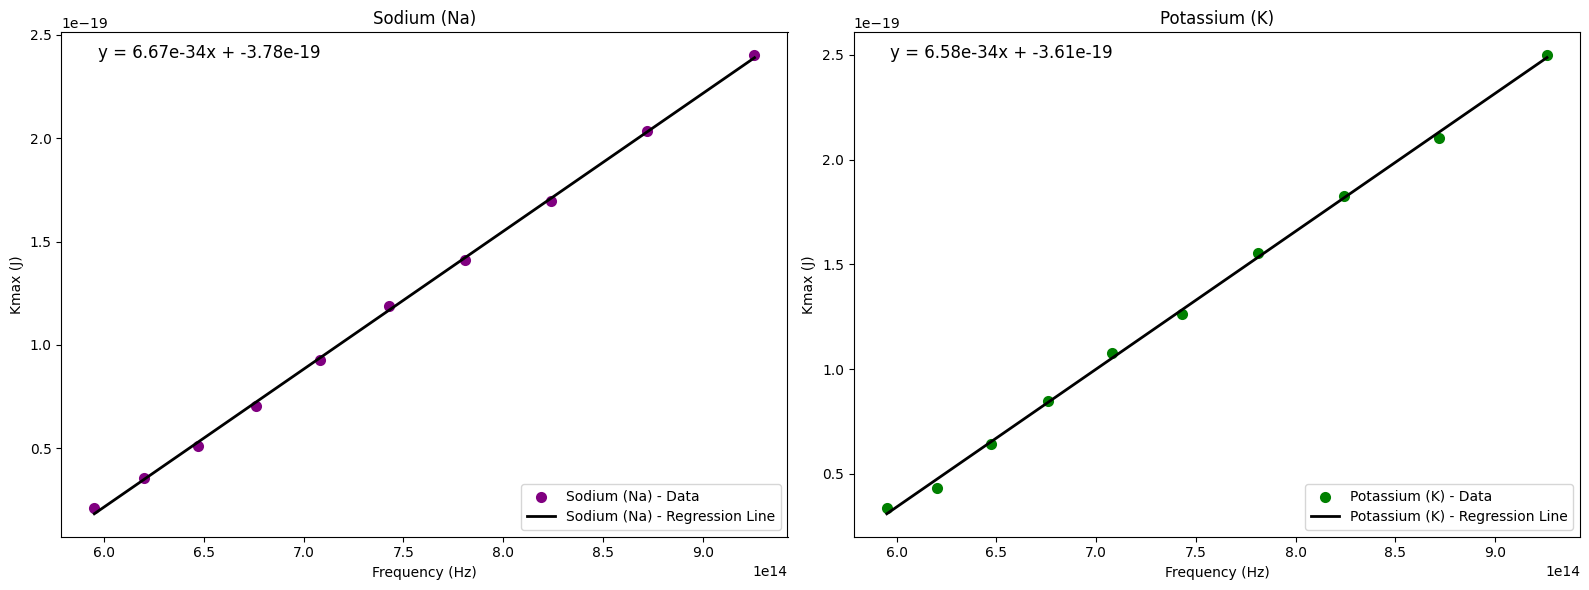

In [44]:
# Linear regression using stats.linregress for Sodium (Na)
b_na, a_na, r_value_na, p_value_na, std_err_na = stats.linregress(df_na['Frequency (Hz)'], df_na['Kmax'])
pre_na = b_na * df_na['Frequency (Hz)'] + a_na

# Linear regression using stats.linregress for Potassium (K)
b_k, a_k, r_value_k, p_value_k, std_err_k = stats.linregress(df_k['Frequency (Hz)'], df_k['Kmax'])
pre_k = b_k * df_k['Frequency (Hz)'] + a_k

# Create a multiplot figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot for Sodium (Na)
axes[0].scatter(df_na['Frequency (Hz)'], df_na['Kmax'], linewidths=2, color='purple', label='Sodium (Na) - Data')
axes[0].plot(df_na['Frequency (Hz)'], pre_na, linewidth=2, color='black', label='Sodium (Na) - Regression Line')
axes[0].set_xlabel('Frequency (Hz)')
axes[0].set_ylabel('Kmax (J)')
axes[0].set_title('Sodium (Na)')
axes[0].legend()

# Add the equation of the line to the Sodium plot
equation_na = f"y = {b_na:.2e}x + {a_na:.2e}"
axes[0].annotate(equation_na, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, backgroundcolor='white')

# Scatter plot for Potassium (K)
axes[1].scatter(df_k['Frequency (Hz)'], df_k['Kmax'], linewidths=2, color='green', label='Potassium (K) - Data')
axes[1].plot(df_k['Frequency (Hz)'], pre_k, linewidth=2, color='black', label='Potassium (K) - Regression Line')
axes[1].set_xlabel('Frequency (Hz)')
axes[1].set_ylabel('Kmax (J)')
axes[1].set_title('Potassium (K)')
axes[1].legend()

# Add the equation of the line to the Potassium plot
equation_k = f"y = {b_k:.2e}x + {a_k:.2e}"
axes[1].annotate(equation_k, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, backgroundcolor='white')

plt.tight_layout()
plt.show()



To finish, after defining the values for the workfunction ($\phi$) we will calculate the cutoff frequency with the equation:
$$ K_{max} = 0 = \frac{\phi}{h} = f_0

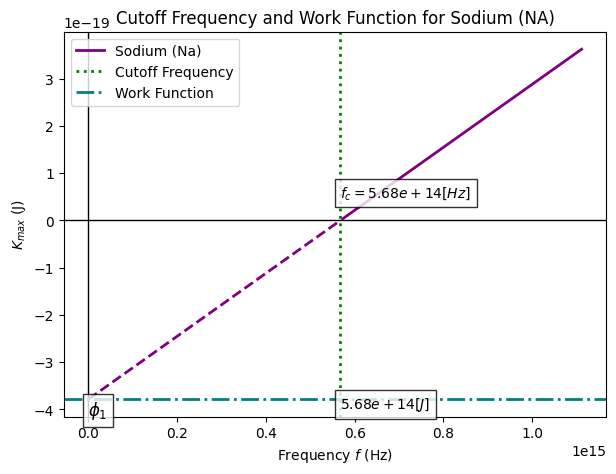

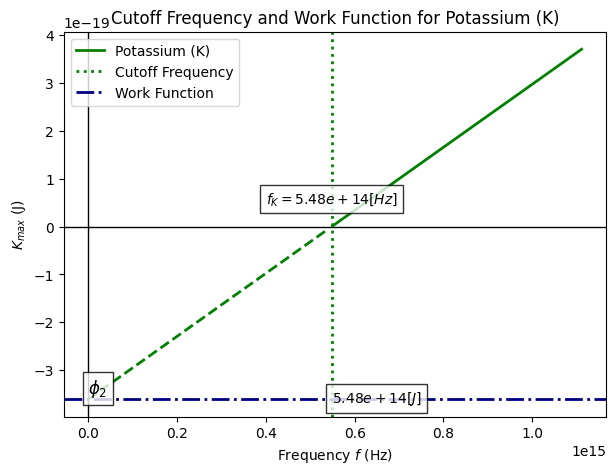

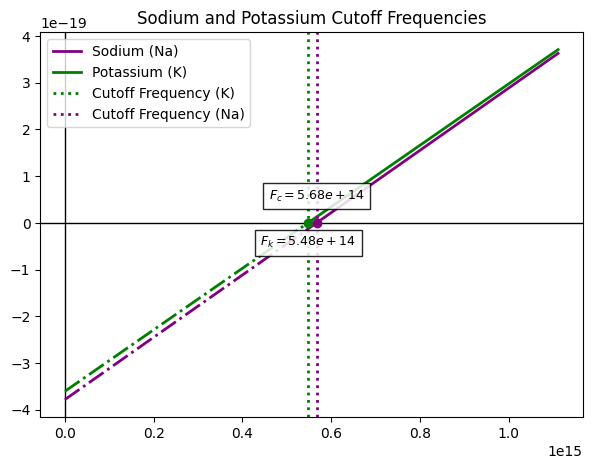

In [45]:
#Deffining values
phi_na = -a_na 
cutoff_na = phi_na / b_na  


phi_k = -a_k 
cutoff_k = phi_k / b_k 

# Create a range of frequencies
frequencies = np.linspace(0, max(df_na['Frequency (Hz)'].max(), df_k['Frequency (Hz)'].max()) * 1.2, 100)


kmax_na = b_na * frequencies + a_na


kmax_k = b_k * frequencies + a_k

# Split the data into positive and negative values
f_pos_na = frequencies[kmax_na >= 0]
kmax_na_pos = kmax_na[kmax_na >= 0]

f_neg_na = frequencies[kmax_na < 0]
kmax_na_neg = kmax_na[kmax_na < 0]


frequencies_positive_k = frequencies[kmax_k >= 0]
kmax_k_positive = kmax_k[kmax_k >= 0]

frequencies_negative_k = frequencies[kmax_k < 0]
kmax_k_negative = kmax_k[kmax_k < 0]

# ==================== Sodium (Na) ====================
plt.figure(figsize=(7, 5))

plt.axhline(0, color='black', linewidth=1)  
plt.axvline(0, color='black', linewidth=1)  

plt.plot(f_pos_na, kmax_na_pos, label='Sodium (Na)', color='purple', linewidth=2)
plt.plot(f_neg_na, kmax_na_neg, color='purple', linestyle='--', linewidth=2)

plt.axvline(x=cutoff_na, color='green', linestyle=':', linewidth=2, label='Cutoff Frequency') 
plt.axhline(y=-phi_na, color='teal', linestyle='-.', linewidth=2, label='Work Function') 

plt.text(cutoff_na , 0.5e-19, f'$f_c = {cutoff_na:.2e} [Hz]$', color='black', fontsize=10, ha='left', bbox=dict(facecolor='white', alpha=0.8))  
plt.text(cutoff_na , -phi_na * 1.05, f'${cutoff_na:.2e} [J]$', color='black', fontsize=10, ha='left', bbox=dict(facecolor='white', alpha=0.8))
plt.text(0, -phi_na , r'$\phi_1$', color='black', fontsize=12, va='top', bbox=dict(facecolor='white', alpha=0.8))

plt.xlabel('Frequency $f$ (Hz)')
plt.ylabel('$K_{max}$ (J)')
plt.title('Cutoff Frequency and Work Function for Sodium (NA)')
plt.legend(loc=2)

plt.show()

# ==================== Potassium (K) ====================
plt.figure(figsize=(7, 5))

plt.axhline(0, color='black', linewidth=1)  
plt.axvline(0, color='black', linewidth=1)  

plt.plot(frequencies_positive_k, kmax_k_positive, label='Potassium (K)', color='green', linewidth=2)
plt.plot(frequencies_negative_k, kmax_k_negative, color='green', linestyle='--', linewidth=2)

plt.axvline(x=cutoff_k, color='green', linestyle=':', linewidth=2, label='Cutoff Frequency') 
plt.axhline(y=-phi_k, color='navy', linestyle='-.', linewidth=2, label='Work Function')  

plt.text(cutoff_k , 0.5e-19, f'$f_K = {cutoff_k:.2e} [Hz]$', color='black', fontsize=10, ha='center', bbox=dict(facecolor='white', alpha=0.8))  
plt.text(cutoff_k , -phi_k * 1.05, f'${cutoff_k:.2e} [J]$', color='black', fontsize=10, va='bottom', bbox=dict(facecolor='white', alpha=0.8))
plt.text(0, -phi_k , r'$\phi_2$', color='black', fontsize=12, va='bottom', bbox=dict(facecolor='white', alpha=0.8))

plt.xlabel('Frequency $f$ (Hz)')
plt.ylabel('$K_{max}$ (J)')
plt.legend(loc=2)
plt.title('Cutoff Frequency and Work Function for Potassium (K)')
plt.show()

# ==================== Sodium (Na) and Potassium (K) ====================
plt.figure(figsize=(7, 5))

plt.axhline(0, color='black', linewidth=1)  
plt.axvline(0, color='black', linewidth=1)  

plt.scatter([cutoff_k], [0], color='green', zorder=3)
plt.scatter([cutoff_na], [0], color='purple', zorder=3)

plt.plot(f_pos_na, kmax_na_pos, label='Sodium (Na)', color='purple', linewidth=2)
plt.plot(f_neg_na, kmax_na_neg, color='purple', linestyle='-.', linewidth=2)
plt.plot(frequencies_positive_k, kmax_k_positive, label='Potassium (K)', color='green', linewidth=2)
plt.plot(frequencies_negative_k, kmax_k_negative, color='green', linestyle='-.', linewidth=2)

plt.axvline(x=cutoff_k, color='green', linestyle=':', linewidth=2, label='Cutoff Frequency (K)') 
plt.axvline(x=cutoff_na, color='purple', linestyle=':', linewidth=2, label='Cutoff Frequency (Na)') 

plt.text(cutoff_k , -0.5e-19, f'$F_k = {cutoff_k:.2e}$', color='black', ha='center', fontsize=9, bbox=dict(facecolor='white', alpha=0.85))
plt.text(cutoff_na, 0.5e-19, f'$F_c = {cutoff_na:.2e}$', color='black', ha='center', fontsize=9, bbox=dict(facecolor='white', alpha=0.85))


plt.legend(loc=2)
plt.title('Sodium and Potassium Cutoff Frequencies')

plt.show()

In conclusion we will get the values as:
1) For Sodium (Na)
    - $\phi = 3.78  [eV]$
    - $f_0 = 5.68 \times 10^{14} [Hz]$
2) For Potassium (K)
    - $\phi = 3.61 [eV]$
    - $f_0 = 5.48 \times 10^{14} [Hz]$

And we can conclude, that Potassium has a higher cutoff frequency.

### (e) Calculate the work function, ϕ, and the cutoff wavelength, λcutoff, for each metal, and the relative errors with respect to the known values (research what these values are).

Now, by reasearching the real values for the workfunctions and cutoff frequencies of the studied metals, we can calculate our relative error as done in the next python cell:

In [46]:
c = ctn.c

phi_na_real = 4.41e-19  
phi_k_real = 3.68e-19   

f_k_real = 5.3e14
f_c_real = 4.4e14

phi_na_calc = -a_na 
phi_k_calc = -a_k  

# Convert frequencies to wavelengths
lambda_c_real = c / f_c_real
lambda_k_real = c / f_k_real
lambda_c_calc = c / cutoff_na
lambda_k_calc = c / cutoff_k

def rel_error(real, calc):
    return abs((real - calc) / real) * 100

print('Relative error for Na Workfunction:',rel_error(phi_na_real, phi_na_calc))
print('Relative error for the K Workfunction:',rel_error(phi_k_real, phi_k_calc))
print('Relative error for Na cutoff Wavelength:', rel_error(lambda_c_real, lambda_c_calc))
print('Relative error for K cutoff Wavelength:',rel_error(lambda_k_real, lambda_k_calc))


Relative error for Na Workfunction: 14.2044291458323
Relative error for the K Workfunction: 2.010213780019068
Relative error for Na cutoff Wavelength: 22.47180492665898
Relative error for K cutoff Wavelength: 3.293650511176401


And our errors in the calculations will state up to:
1) For Sodium (Na)
    - $Er_{\phi} = 14 \%$
    - $Er_{\lambda_0} = 22 \%$
2) For Potassium (K)
    - $Er_{\phi} = 2 \%$
    - $Er_{\lambda_0} = 3.4 \%$

And our Final Results will be:

#### **Sodium (Na)**

- Work function ($\phi$): $3.78 \pm 0.53 \text{ eV}$
- Threshold frequency ($f_0$): $(5.68 \pm 1.65) \times 10^{14} \text{ Hz}$

#### **Potassium (K)**

- Work function ($\phi$): $3.61 \pm 0.07 \text{ eV}$
- Threshold frequency ($f_0$): $(5.48 \pm 0.19) \times 10^{14} \text{ Hz}$

In adittion, Since the relative error for Sodium was relatively high, I tried to get the data again, but the improvement was almost neglectable. Therefore the reason for the reported values

## Excercise 2 : Blackbody Radiation

First, we are going to read the data and make ajustments to it to make it more handleable for the purpose we are seeiking.

In [47]:
df_2 = pd.read_csv('C:/Users/sedig/Desktop/6to SEMESTRE/quantum-mechanics-1/sun_spectra.csv', usecols=['Wavelength (nm)', 'Extraterrestrial W*m-2*nm-1'])
df_2.head(10)

,Wavelength (nm),Extraterrestrial W*m-2*nm-1
0,280.0,0.08200
1,280.5,0.09900
2,281.0,0.15000
3,281.5,0.21200
4,282.0,0.26700
5,282.5,0.30300
6,283.0,0.32500
7,283.5,0.32300
8,284.0,0.29900
9,284.5,0.25024


In [48]:
df_2['Extraterrestrial W*m-2*nm-1'] = df_2['Extraterrestrial W*m-2*nm-1'] /1000
df_2 = df_2.rename(columns={'Extraterrestrial W*m-2*nm-1': 'Extraterrestrial kW*m^2*nm^-1'})
df_2.head(10)

,Wavelength (nm),Extraterrestrial kW*m^2*nm^-1
0,280.0,0.000082
1,280.5,0.000099
2,281.0,0.000150
3,281.5,0.000212
4,282.0,0.000267
5,282.5,0.000303
6,283.0,0.000325
7,283.5,0.000323
8,284.0,0.000299
9,284.5,0.000250


### (a) Calculate the solid angle Ω subtended by the Sun in units of sr from the Sun radius, R, and the Earth-Sun distance, d.


Now we will calculate the solid angle, that is the angle that the sun occupies in the sky. We will use the formula:
$$\omega = 2 \pi \left(1 - \frac{\sqrt{d^2 - R^2}}{d}\right)$$

Where, R is the radius of the sun, and d is the distance from the earth to the sun.

In [49]:
R = 696340
d = 151.35e6 

omega = 2 * np.pi * (1 - (np.sqrt(d**2 - R**2)/d))
print(f"omega = {omega:.2e} [Sr]")

omega = 6.65e-05 [Sr]


### (b) Use your favourite programming tool to open the above CSV data file and take the first two columns from it, i.e. the wavelength (λ in nm) and spectral radiosity (Jλ in kW m−2 nm−1 ). Then, make a high-quality labeled plot of spectral radiosity (in the Y-axis) versus wavelength (in the X-axis). Does the relation between the two look linear?

After, for exploratory purproses, we are gonna plot the data we have, and see what other data normalization and handling we must do to improve our results

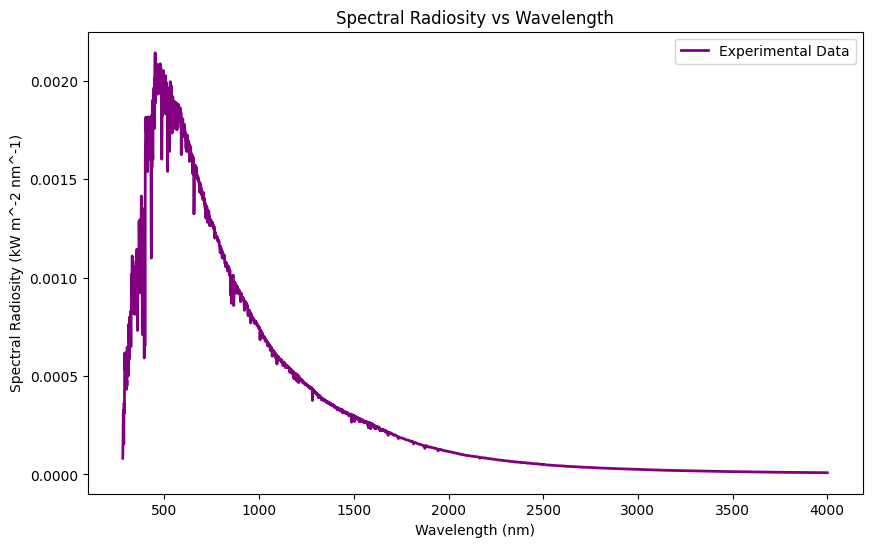

In [50]:
# Plot the spectral radiosity vs wavelength
plt.figure(figsize=(10, 6))
plt.plot(df_2['Wavelength (nm)'], df_2['Extraterrestrial kW*m^2*nm^-1'], label='Experimental Data', color='purple', linewidth=2)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Spectral Radiosity (kW m^-2 nm^-1)')
plt.title('Spectral Radiosity vs Wavelength')
plt.legend()
plt.show()

As we can see, the relation looks **non-linear**

After that, we will normalize our spectral radiosity data, to get the corresponding data, following the next procedure:
$$ J_{\lambda} = \int_{\Omega} B_{\lambda} \,d\Omega$$
$$ J_{\lambda} = B_{\lambda} \Omega $$
$$ B_{\lambda} = \frac{J_{\lambda}}{\Omega}$$

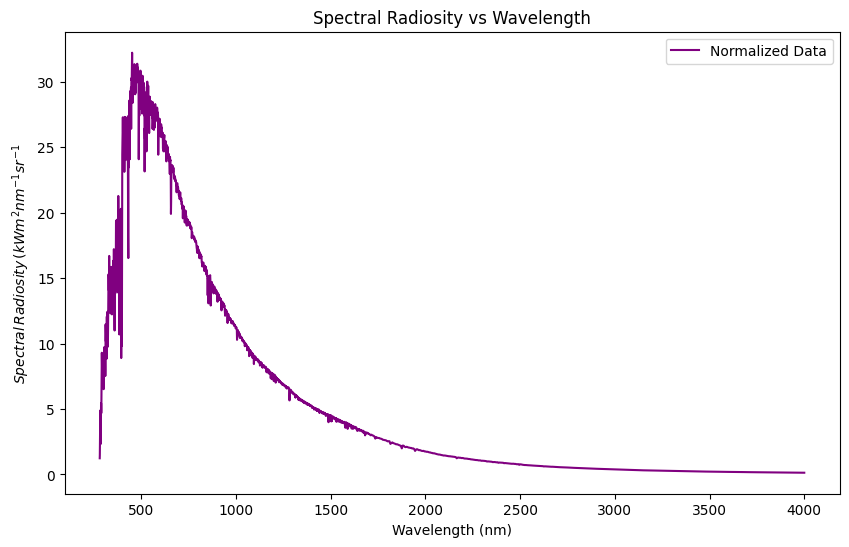

In [51]:
# Normalize the extraterrestrial irradiance by the solid angle Omega
df_2['Extraterrestrial kW*m-2*nm-1*sr-1'] = df_2['Extraterrestrial kW*m^2*nm^-1']/ omega

# Plot the smoothed data
plt.figure(figsize=(10, 6))
plt.plot(df_2['Wavelength (nm)'], df_2['Extraterrestrial kW*m-2*nm-1*sr-1'], label='Normalized Data', color='purple')
plt.xlabel('Wavelength (nm)')
plt.ylabel(r'$Spectral\, Radiosity\, (kW m^{2} nm^{-1} sr^{-1}$')
plt.title('Spectral Radiosity vs Wavelength')
plt.legend()
plt.show()

### (c) Define a physically-motivated fitting function (i.e. Jλ in units of kW m−2 nm−1 as obtained from the Planck law). Which variable should be the free parameter for the regression?
### (d) Carry out the regression using your favourite programming tool. Report the best-fit function, what is the temperature of the Sun? Hint: since the fitting function is not a simple polynomial function, providing an initial guess for the regression may help some regression algorithms in Mathematica or Python.

Now, by having the correct data, units and the correct $B_{\lambda}$ we can continue to To fit the experimental data to Planck's law, we will use the following formula:

$$ B_{\lambda} = \frac{2hc^2}{\lambda^5} \left( \frac{1}{e^{\frac{hc}{\lambda k_B T}} - 1} \right) $$

We will use this formula to fit the data and determine the temperature of the Sun.
After the dimensional analisis, we can see that the function, will have units as:
$$\frac{W}{m^2 \cdot nm \times 10^{-36} \cdot Sr} $$

But since, we are working with the spectral radiosity, as kW, we have to add a proporcionality constant to our formula, as stated:
$$\frac{kW \times 10^{33}}{m^2 \cdot nm \cdot Sr} $$
And also take to account that the free parameter for the regression is the temperature $T$.

In [52]:
# Define constants
h = ctn.h
c = ctn.c
kb = ctn.k

def planck(lb, T):
  bl = ((2 * h * c**2) / (lb**5)) * (1. / (np.exp((h * c) / (kb * lb * T)) - 1.))
  return bl * 1E33  # Convert to kW/m^2/nm/sr

# Fit the Planck function 
fitT, pcov = curve_fit(planck, df_2['Wavelength (nm)'], df_2['Extraterrestrial kW*m-2*nm-1*sr-1'], p0=5000e-9) # we use e-9 cause of the nm in the exponential function

# Print the fitted temperature
print(f"Predicted Temperature and best fit function: {fitT[0]*1e9} [K]")


Predicted Temperature and best fit function: 5753.199317958274 [K]


### (e) Make a high-quality labeled plot of spectral radiosity (in the Y-axis) versus wavelength (in the X-axis) showing both the experimental data and the best-fit model (obtained from Planck’s law for the fitted temperature).

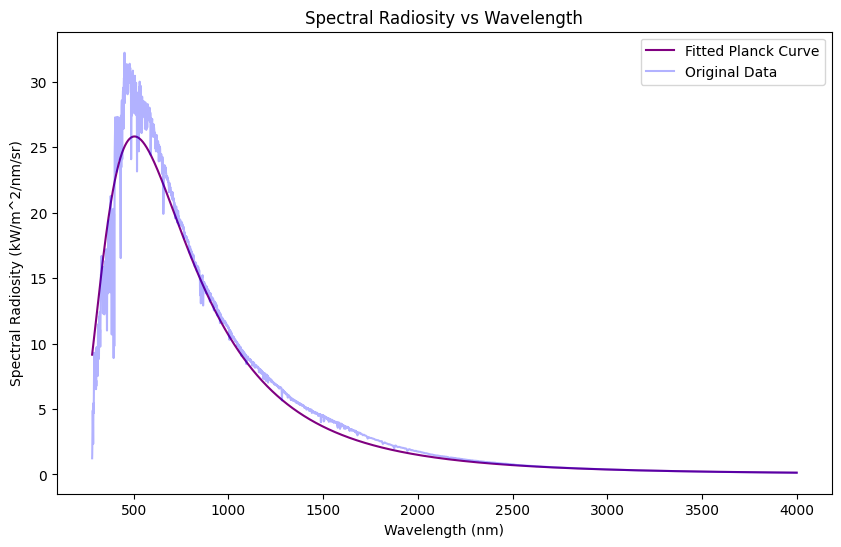

In [53]:
# Plot the fitted Planck curve and the original data
plt.figure(figsize=(10, 6))
plt.plot(df_2['Wavelength (nm)'], planck(df_2['Wavelength (nm)'], fitT[0]), color='purple', label='Fitted Planck Curve')
plt.plot(df_2['Wavelength (nm)'], df_2['Extraterrestrial kW*m-2*nm-1*sr-1'], color='blue', alpha=0.3, label='Original Data')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Spectral Radiosity (kW/m^2/nm/sr)')
plt.title('Spectral Radiosity vs Wavelength')
plt.legend()
plt.show()

### (f) Finally, you will compare the results to predictions based on classical theory. As you know, the black body radiation in classical theory is described by the Rayleigh-Jeans law. Calculate the spectral radiosity based on temperature, but now according to the Rayleigh-Jeans function given below.

Finally, for the Raleigh Jeans model, we will use the formula that states as: 
$$B_{\lambda} = \frac{2 c k_b T}{\lambda^4}$$

With also a proporcionality constant as: $1 \times 10^{38}$

In [99]:
# Define the Rayleigh-Jeans function
def rayleigh_jeans(wavelength, T):
    return (2 * c * kb * T) / (wavelength**4) * 1e38  / omega# Convert to kW/m^2/nm/sr

# Calculate the spectral radiance using the Rayleigh-Jeans function
r_j = rayleigh_jeans(df_2['Wavelength (nm)'] , fitT[0] * 1e-9)  # Convert nm to meters and temperature to Kelvin

### (g) Make a high-quality labeled plot of spectral radiance (in the Y-axis) versus wavelength (in the X-axis) showing the experimental data, the best-fit model (i.e. Planck’s law for the fitted temperature), and the classical model obtained in (f). Does classical theory correctly describe the black body spectrum of the Sun? 


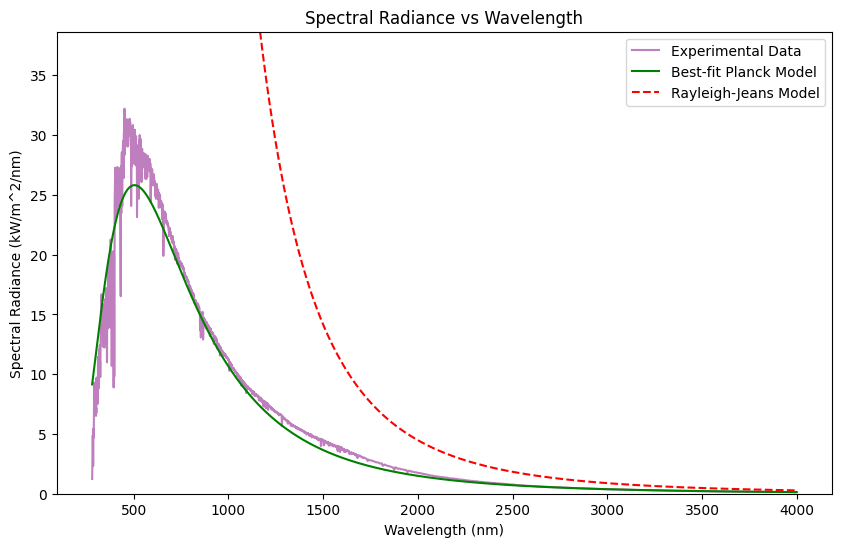

In [105]:
# Plot the experimental data, the best-fit model (Planck's law), and the Rayleigh-Jeans model
plt.figure(figsize=(10, 6))
plt.plot(df_2['Wavelength (nm)'], df_2['Extraterrestrial kW*m-2*nm-1*sr-1'], label='Experimental Data', color='purple', alpha=0.5)
plt.plot(df_2['Wavelength (nm)'], planck(df_2['Wavelength (nm)'], fitT[0]), label='Best-fit Planck Model', color='green')
plt.plot(df_2['Wavelength (nm)'], r_j, label='Rayleigh-Jeans Model', color='red', linestyle='--')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Spectral Radiance (kW/m^2/nm)')
plt.title('Spectral Radiance vs Wavelength')
plt.legend()
plt.ylim(0, df_2['Extraterrestrial kW*m-2*nm-1*sr-1'].max() * 1.2)
plt.show()

Therefore, we can not spect to Classical mechanics to correctly predict, the black body spectrum of the sun

### Appendix

At the first times, i was having a lot of trouble to make the fit correctly and recurred to a CNN to try to improve results. But afterwards, as seen previously, the fit went better. Therefore as an adding , im reporting this method:

**Convolutional Neural Network (CNN) for Spectral Radiosity Prediction**

A Convolutional Neural Network (CNN) is a type of deep learning model particularly well-suited for tasks involving spatial hierarchies in data. While CNNs are traditionally used for image and video recognition, they can also be effectively applied to one-dimensional data, such as the spectral radiosity data in this excercise.

**How CNN Works**
1. Convolutional Layers: These layers apply convolution operations to the input data, using filters to detect patterns. In the context of spectral radiosity, the convolutional layers can identify patterns in the wavelength data that correlate with the radiosity values.

2. Activation Functions: After each convolution operation, an activation function (e.g., ReLU) is applied to introduce non-linearity into the model, allowing it to learn more complex patterns.

3. Pooling Layers: These layers reduce the dimensionality of the data, retaining the most important features while reducing computational complexity. This step is optional and was not used in our specific model.

4. Flattening: The output of the convolutional layers is flattened into a one-dimensional array, which is then fed into fully connected (dense) layers.

5. Fully Connected Layers: These layers perform the final classification or regression tasks. In our case, they predict the spectral radiosity values.

6. Output Layer: The final layer produces the predicted radiosity values.

**Why CNN is Good for This Task**
- Pattern Recognition: CNNs excel at recognizing patterns in data. For spectral radiosity, this means identifying how different wavelengths correlate with radiosity values.
- Feature Extraction: The convolutional layers automatically extract relevant features from the input data, reducing the need for manual feature engineering.
- Non-Linearity: The activation functions introduce non-linearity, allowing the model to learn complex relationships between wavelength and radiosity.
- Scalability: CNNs can handle large datasets efficiently, making them suitable for high-resolution spectral data.

In [ ]:
# Prepare the data
X = df_2['Wavelength (nm)'].values.reshape(-1, 1)
y = df_2['Extraterrestrial kW*m^2*nm^-1'].values


scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape the data for the CNN
X_train = X_train.reshape(-1, X_train.shape[1], 1)
X_test = X_test.reshape(-1, X_test.shape[1], 1)

model = Sequential([
    Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=90, validation_data=(X_test, y_test))

# Predict using the trained model
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)


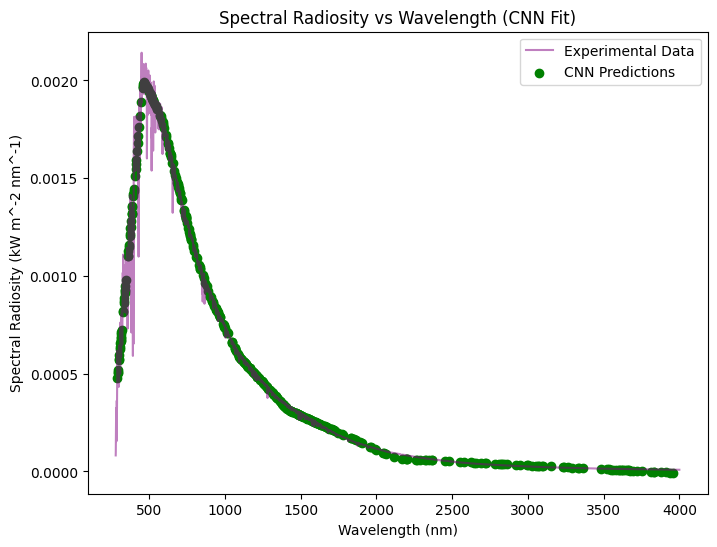

In [77]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(df_2['Wavelength (nm)'], df_2['Extraterrestrial kW*m^2*nm^-1'], label='Experimental Data', color='purple', alpha=0.5)
plt.scatter(scaler_X.inverse_transform(X_test.reshape(-1, 1)).flatten(), y_pred.flatten(), label='CNN Predictions', color='green')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Spectral Radiosity (kW m^-2 nm^-1)')
plt.title('Spectral Radiosity vs Wavelength (CNN Fit)')
plt.legend()
plt.show()

In [57]:
print("Sample Predictions:")
for i in range(5):
    print(f"Wavelength: {scaler_X.inverse_transform(X_test[i].reshape(-1, 1)).flatten()[0]:.2f} nm, "
          f"Predicted Radiosity: {y_pred[i][0]:.6f} kW*m^-2*nm^-1")

max_wavelength_index = np.argmax(y_pred)
max_wavelength = scaler_X.inverse_transform(X_test[max_wavelength_index].reshape(-1, 1)).flatten()[0]
max_radiosity = y_pred[max_wavelength_index][0]

print(f"Maximum Wavelength in Predictions: {max_wavelength:.2f} nm, Predicted Radiosity: {max_radiosity:.6f} kW*m^-2*nm^-1")
    

Sample Predictions:
Wavelength: 1554.00 nm, Predicted Radiosity: 0.000267 kW*m^-2*nm^-1
Wavelength: 513.00 nm, Predicted Radiosity: 0.001921 kW*m^-2*nm^-1
Wavelength: 1494.00 nm, Predicted Radiosity: 0.000288 kW*m^-2*nm^-1
Wavelength: 1066.00 nm, Predicted Radiosity: 0.000632 kW*m^-2*nm^-1
Wavelength: 1450.00 nm, Predicted Radiosity: 0.000304 kW*m^-2*nm^-1
Maximum Wavelength in Predictions: 467.00 nm, Predicted Radiosity: 0.001990 kW*m^-2*nm^-1


Afterwards, using the Wien's Displacement Law , we compute the predicted temperature.

In [58]:
sigma  = ctn.Wien
print(sigma / (467 * 1e-9))

6205.079132762312


But we can see the model it's not quite as good in predicting, mainly because of underfitting, if we created synthetical data, maybe the model will improve it's performance, but it's not the best way to go for this excercise, kind of an overkill

## Excersice 3 : Quantum Concepts and Experiments

### a) 
Calculate the Compton wavelengths of an electron, a muon, and a tau particle. How much energy would photons with those wavelengths have?

To solve this, we will describe the Compton wavelength as:
$$ \lambda_{C} = \frac{h}{m c}$$

And knowing that:
$$ f = \frac{c}{\lambda}$$
$$ E_{\gamma} = h f$$

We can compute:

In [71]:
h = ctn.h #[J*s] Planck's constant
c = ctn.c #[m/s] speed of light
m_e = ctn.m_e #[kg] mass of electron
m_m = 1.9e-28 #[kg] mass of muon
m_t = 3.16e-27 #[kg] mass of tauon

def compton(m):
    return h/(m*c) * 1e9

print('Compton Wavelength for Electrons:', compton(m_e),'[nm]')
print('Compton Wavelength for Muons:', compton(m_m),'[nm]')
print('Compton Wavelength for Tauons:', compton(m_t),'[nm]')

def electron_energy(wavelength):
    return (h * c / wavelength) / e

print('Energy of the electron compton wavelength:', electron_energy(compton(m_e)),'[eV]')
print('Energy of an electron with a moun compton wavelength:', electron_energy(compton(m_m)), '[eV]')
print('Energy of an electron with a tauon compton wavelength:', electron_energy(compton(m_t)), '[eV]')

Compton Wavelength for Electrons: 0.002426310238683092 [nm]
Compton Wavelength for Muons: 1.1632732075285439e-05 [nm]
Compton Wavelength for Tauons: 6.994364222481753e-07 [nm]
Energy of the electron compton wavelength: 0.0005109989499961642 [eV]
Energy of an electron with a moun compton wavelength: 0.10658218347228461 [eV]
Energy of an electron with a tauon compton wavelength: 1.7726299988022067 [eV]


### (b) 

1) We wish a uranium-238 nucleus to have enough energy so that its de Broglie wavelength is equal to its nuclear radius, which is 6.8 fm. How much energy is required? Take the nuclear mass to be 238 u.



We must consider that the de Broglie wavelength is defined as:
$$ \lambda_{db} = \frac{h}{mv}$$
But, since we want the wavelength to be equal to the Uranium-238 nuclear radious, we can re arrange the equation as so:
$$ v = \frac{h}{m r_0}$$
Therefore, having the velocity of the particle to have that characteristic we can compute it's energy as:
$$ E = \frac{p^2}{2 m } = \frac {m^2 v^2}{2 m} = \frac  {m v^2}{2}

In [107]:
r_0 = 6.8 * 1e-15 #[m]
m_u = 238 * 1.66054e-27 #[kg]

v = h/(m_u * r_0) 

E = ((m_u * v**2) / 2) / e

print('Energy of a Uranium-238 nucleus for a de Droglie wavelength of 6.8 fm:', E * 1e-3, '[KeV]')

Energy of a Uranium-238 nucleus for a de Droglie wavelength of 6.8 fm: 74.9769112777566 [KeV]


2) A non-relativistic particle is moving three times as fast as an electron. The ratio of their de Broglie wavelengths, particle to electron, is 1.813 × 10−4. Identify the particle. Hint: Research tables with rest masses of particles.

As the excercise states, we know that:
$$ \sigma_v = \frac{v}{v_e} = 3$$
$$ \sigma_w =\frac{\lambda_{db}}{\lambda_{db_e}} = 1.813 \times 10^{-4}$$
Afterwards, we can denote that 
$$ h = h$$
$$\lambda_{db_e} m_e v_e = \lambda m v$$
$$m = m_e \frac{1}{\sigma_v} \frac{1}{\sigma_f}

In [73]:
v_factor = 3
wave_factor = 1.813e-4

m = m_e * (1/v_factor) * (1/wave_factor)

print('Mass of the unknown particle:', m, '[kg]') 
print('The scipy library neutron mass is:',ctn.neutron_mass, "[kg]")

Mass of the unknown particle: 1.67482693537415e-27 [kg]
The scipy library neutron mass is: 1.67492749804e-27 [kg]


Now, adding on searching on internet for a table on rest mass of known particles
<center>
<img src="https://radiologykey.com/wp-content/uploads/2017/01/00007.jpeg" alt="Image description" style="width:1000px;"/>
</center>

<center>
Fig 1. Rest Mass of Particles Table
</center>
We can suggest that after our calcultions the unknown particle can be a neutron.


- Reference: Radiology Key. (n.d.). *Introduction*. Radiology Key. https://radiologykey.com/introduction-38/

### (c) 
Suppose we have an experiment in which monochromatic light is scattered by an electron at an angle of 15°. What is the fractional increase in the wavelength, ∆λ/λ, if the incident light has: 

1) a λ = 660 nm (i.e. photons are in the visible region), and 
2) a λ = 0.07 nm (i.e. photons are in the X-ray region)?

Why were X-rays used by Compton in his experiments?


Here we are gona use the Compton Scattering formula, stated as:
$$ \Delta \lambda = \frac{h}{mc} (1- cos(\theta))$$
And also the fractional increase of wavelenghts stated in the problem as:
$$ \frac{\Delta \lambda}{\lambda}

In [74]:
photon_1 = 660e-9
photon_2 = 0.07e-9
angle_rate = 1 - np.cos(15 * (np.pi/180))

delta_wavelegth = (h/(m_e * c)) * angle_rate

def fractional_increase(wavelength):
    return delta_wavelegth / wavelength

print('Fractional increase in wavelength of 660 [nm]:', fractional_increase(photon_1))
print('Fractional increase in wavelength of 0.07 [nm]:', fractional_increase(photon_2))


Fractional increase in wavelength of 660 [nm]: 1.2526441901439364e-07
Fractional increase in wavelength of 0.07 [nm]: 0.0011810645221357115


Compton used X-rays in his experiments because their shorter wavelengths, compared to visible light, make the Compton wavelength shift more noticeable and easier to measure. The shift is proportional to the wavelength of the incident light, so with X-rays, the effect is more pronounced. Additionally, the high energy of X-ray photons makes them ideal for studying interactions with electrons, allowing Compton to verify quantum mechanical predictions about particle interactions more effectively.

### d)
A typical microwave oven operates at roughly 2.5 GHz at a maximum power of 350W.
How many photons per second can it emit? What about a low-power laser operating at
8 mW at 625 nm, or a mobile phone operating at 0.25W at 850 MHz?

Here, we are gonna use the Power formula stated as, and remembering that energy for photons is quantized:
$$ P = \frac{E}{t} = \frac {n}{t} \cdot hf$$

And remembering that:
$$ f = \frac{c}{\lambda}$$

Finally, re arrenging our formula we would have:
$$ n_\gamma = \frac{P}{h f} (1s)

In [75]:
f_micro = 2.5e9
f_laser = c / 629e-9
f_phone = 850e6

def photons_n(P, f):
    return P /(h * f) #Assuming eficciency of 1

print('Number of photons per second for a 2.5 GHz microwave:', photons_n(350, f_micro))
print('Number of photons per second for a 625 nm laser:', photons_n(8e6, f_laser))
print('Number of photons per second for a 850 MHz phone signal:', photons_n(0.25, f_phone))

Number of photons per second for a 2.5 GHz microwave: 2.1128662514990127e+26
Number of photons per second for a 625 nm laser: 2.5331674567874914e+25
Number of photons per second for a 850 MHz phone signal: 4.4387946460063294e+23


### e) 
In a double-slit experiment, electrons are fired one by one toward a pair of slits separated by a distance $( d = 5.0 \times 10^{-7} , \text{m} )$. The electron source emits electrons with a kinetic energy of 90 eV. The screen is placed $( L = 1.1 , \text{m} )$ behind the slits, and an interference pattern is observed.

1) What is the de Broglie wavelength of the electrons?

2) Determine the positions $( y_1 )$ and $( y_2 )$ of the first and second bright fringes on the screen.



First, we are going to remember that:
$$\lambda_{db} = \frac{h}{mv}$$
And for the 2 slit experiment, we have:
$$ Y_m = \frac{mL\lambda}{d}

In [76]:
kinetic_E = 90 * e #[J]
p = np.sqrt(2 * m_e * kinetic_E) 

dbw = h / p

print('de Broglie wavelength of an electron with a kinetic energy of 90 eV:', dbw, '[m]')

d = 5.0e-7 #[m]
L = 1.1 #[m]

def slit_postion(m, dbw):
    return (m * L * (dbw)) / d * 1e-9

print('Postion of y1 slit for an electron with a kinetic energy of 90 eV:', slit_postion(1, dbw), '[m]')
print('Postion of y2 slit for an electron with a kinetic energy of 90 eV:', slit_postion(2, dbw), '[m]')

de Broglie wavelength of an electron with a kinetic energy of 90 eV: 1.2927664782107788e-10 [m]
Postion of y1 slit for an electron with a kinetic energy of 90 eV: 2.844086252063714e-13 [m]
Postion of y2 slit for an electron with a kinetic energy of 90 eV: 5.688172504127428e-13 [m]


#### f)
 Let $z_1 = -3 + 7i$ and $z_2 = 1 - 5i$, where $i \equiv \sqrt{-1}$.

---

1. Calculate the quotient: $ \frac{z_1}{z_2} $

We use the formula for dividing complex numbers:

$$
\frac{z_1}{z_2} = \frac{z_1 \cdot \overline{z_2}}{z_2 \cdot \overline{z_2}}
$$

where $ \overline{z_2} $ is the complex conjugate of $ z_2 $, which is $ 1 + 5i $.

Let's first calculate the numerator and the denominator:

- **Numerator:**
$$
z_1 \cdot \overline{z_2} = (-3 + 7i)(1 + 5i)
$$
$$
= -3(1) + -3(5i) + 7i(1) + 7i(5i)
$$
$$
= -3 - 15i + 7i + 35i^2
$$
Since $i^2 = -1$:
$$
= -3 - 15i + 7i + 35(-1)
$$
$$
= -3 - 15i + 7i - 35
$$
$$
= -38 - 8i
$$

- **Denominator:**
$$
z_2 \cdot \overline{z_2} = (1 - 5i)(1 + 5i)
$$
$$
= 1^2 - (5i)^2 = 1 - 25i^2
$$
$$
= 1 + 25 = 26
$$

Thus, the quotient is:

$$
\frac{z_1}{z_2} = \frac{-38 - 8i}{26} = -\frac{38}{26} - \frac{8i}{26} = -\frac{19}{13} - \frac{4i}{13}
$$

$$
\frac{z_1}{z_2} = -\frac{19}{13} - \frac{4i}{13}
$$

2. Show that the multiplication of either $z_1$ by $e^{i \phi}$ or $z_2$ by $e^{i \phi}$ is equivalent to rotating them by $ \phi $ in a 2D complex plane

To show this, let's first express the complex number $z$ in polar form:

A complex number $z = x + yi$ can be written as:

$$
z = r e^{i \theta}
$$

where:
- $r = |z| = \sqrt{x^2 + y^2}$ is the magnitude (modulus) of $z$,
- $\theta = \text{arg}(z) = \tan^{-1}\left(\frac{y}{x}\right)$ is the argument (phase) of $z$.

Now, multiplying $z$ by $e^{i \phi}$:

$$
z' = z \cdot e^{i \phi} = r e^{i (\theta + \phi)}
$$

This shows that the phase (argument) of the complex number is shifted by $ \phi $, which geometrically means a rotation by an angle $ \phi $ in the complex plane.

Thus, multiplying either $z_1$ or $z_2$ by $e^{i \phi}$ rotates them by $ \phi $ in the 2D complex plane.